# Unsupervised Machine Learning

## Agenda
- Introduction to Upsupervised learning
  - What is unsupervised learning
  - Approaches
- Clustering Techniques
  - Overview
  - K-Means Clustering
    - Algorithm and its implementation
    - Elbow Method
    - Silhouette Score
  - Heirarchical Clustering
     -  Agglomerative Clustering
     -  Dendrogram anf Linkage Criteria
  - DBSCAN (Density Based Spatial Clustering of Applications with Noise)
  

## What is unsupervised learning
unsupervised learning is an ML technique where the model learns from unlabelled data and find pattern within it
- deals with unlabelled data
- algorithms works independently t0 discover hideen info without guidance
- it claasifies information on the basis of similarities differences or patterns

## Approaches
- Clustering - in this approach we group the observations into clusters based on similarities. most popular technique are
  - K-Means
  - Heirarchical
  - DBSCAN
- Dimensionality Reduction - Th aim here is to group the feature while preserving essential information. The most common and widely used algorithm is Principal Component Analysis(PCA

- Association Rule Learning-  kind of approach in which we try to identify relationship between features and typically looks for values that frequently occurs together. Most Common algorithm Apriori.(Example where it is applied: Diaper Beer Case Study)



## Clustering Techniques
### Overview
- Clustering Techniques divides the data Set into multiple clusters ensuring the similarity within each Cluster
- goal is to segregate data points with similar traits.


# K Means Clustering
- 1. Choose number of clusters (`k`)
- 2. Random choose any points equals to `k` to be the centroids
- 3. Calculate Euclidean Distance of a data point to each chosen centroids.
  4. Assign the data point to centroid with minimum distance
  5. Repeat Step 3 & 4 untill all points are assigned to some centroid.
  6. Calculate new centroids by taking mean of the clusters created.
  7. Repeat step 3 to 6 untill centroids stops moving( no change in the centroid values)


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_06/Updated/new/Unsupervised.png)

In [1]:
# Implement K means Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df =  pd.read_csv('Mall_customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X  =  df.iloc[:, 3:]

In [7]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


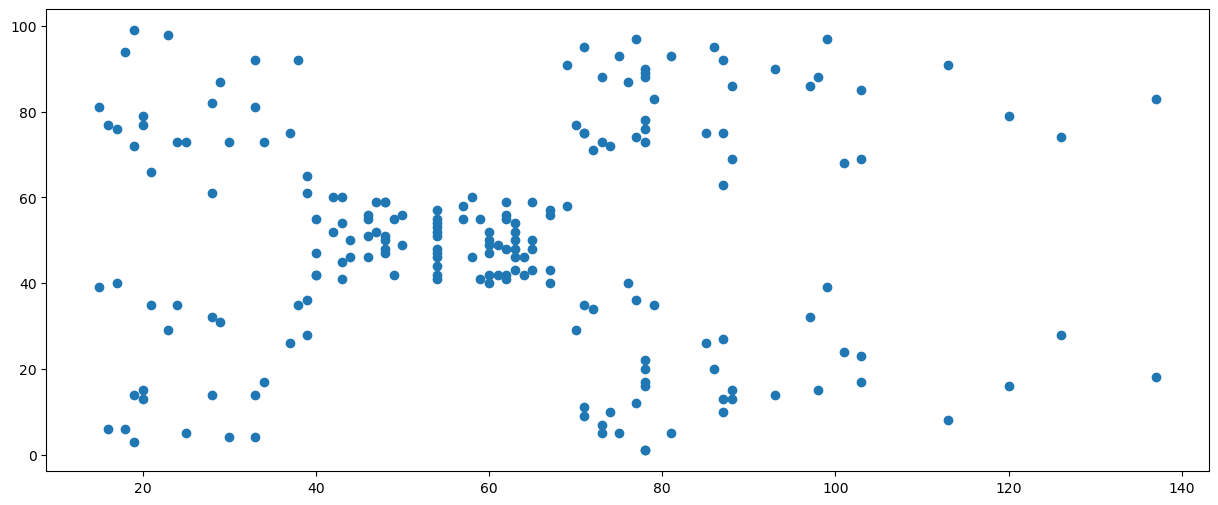

In [9]:
plt.figure(figsize = (15,6))
plt.scatter(X.iloc[:, 0], X.iloc[:,1])
plt.show()

# Elbow Method
The elbow method involves plotting the number of clusters against the distortion or inertia to identify a significant flattening point, known as the elbow point.
- The elbow point represents a trade-off between capturing meaningful patterns and avoiding excessive complexity, indicating the optimal number of clusters.
- By choosing the value of k at the elbow point, you strike a balance between cluster quality and simplicity, resulting in a reasonable number of clusters.

**Steps to perform:**
- Calculate the WCSS (within-cluster sum of squares) for different numbers of clusters.
  - WCSS measures how compact a cluster is in k-means clustering. It calculates the total squared distance of all points within a cluster to their cluster's centroid. In simpler terms, it tells you how spread out the points are within a cluster.
  - The lower the WCSS, the closer the points are to their cluster's center.
- Plot the WCSS values to find the optimal number of clusters.

In [31]:
from sklearn.cluster import KMeans


C:\Users\SLP12264\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SLP12264\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SLP12264\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SLP12264\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

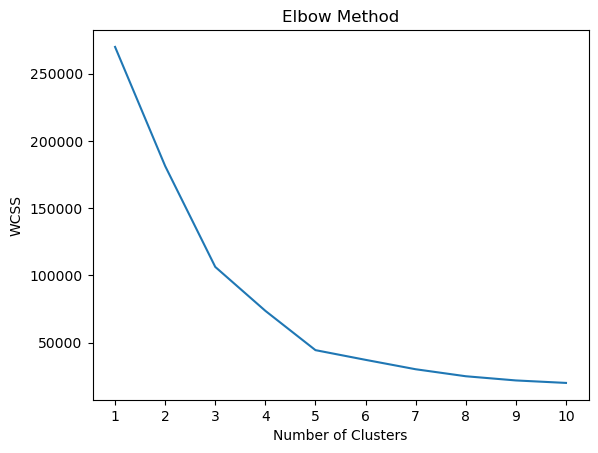

In [35]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters =i, random_state = 42)
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()   


In [36]:
##  from the plotted graph number of clusters is 5, train kmeans model with 5 clusters


model =  KMeans(n_clusters =  5, random_state =42)
y_kmeans =  model.fit_predict(X)

C:\Users\SLP12264\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [39]:
Xnew = X.copy()
Xnew['y_kmeans'] = y_kmeans
Xnew.head()

,Annual Income (k$),Spending Score (1-100),y_kmeans
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [54]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [40]:
import seaborn as sns

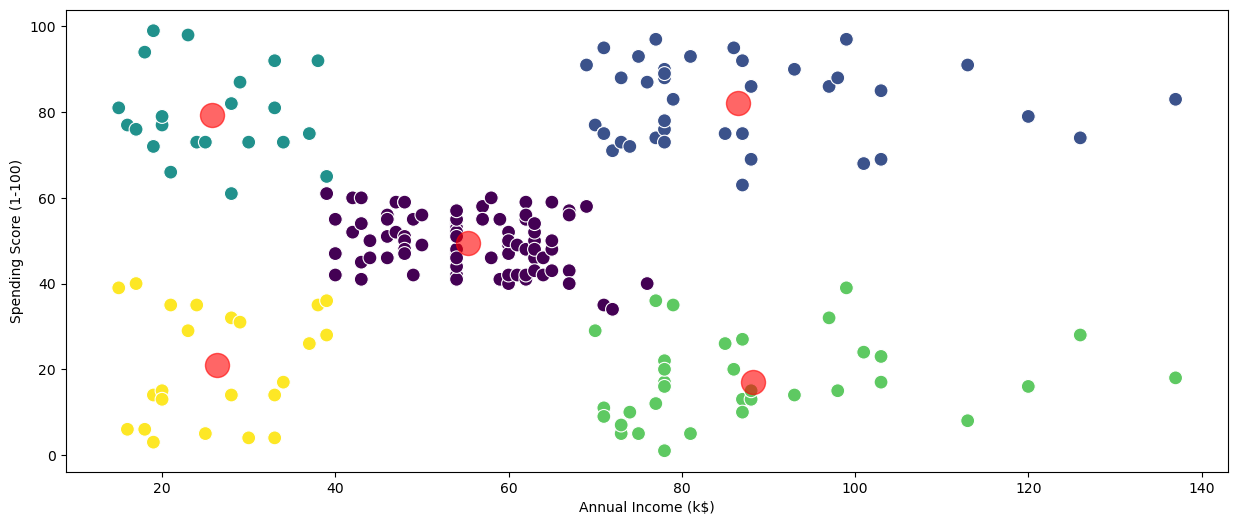

In [56]:
plt.figure(figsize = (15,6))
sns.scatterplot(x='Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'y_kmeans', data = Xnew, palette = 'viridis' , 
                size = 'y_kmeans',sizes = [100,100,100,100,100], legend = False)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s =300, c= 'red', alpha = 0.6)

plt.show()

# Silhouette Score

- Silhouette score measures how well data points fit their assigned cluster by considering both similarity within a cluster and separation between clusters.
- Measures the quality of clustering by comparing how similar an object is to its own cluster versus other clusters.
     - **Intra-cluster distance** is the average distance between points within the same cluster. A lower intra-cluster distance indicates that the cluster is more compact, which is generally desirable.
     - **Inter-cluster distance** measures the distance between clusters. Ideally, you want clusters to be as far apart as possible (high inter-cluster distance) to ensure that they are distinct from one another.

The score ranges from -1 to 1.
  - **Close to 1:** Indicates that the object is well-clustered and appropriately assigned to its cluster.
  - **Close to 0:** Indicates that the object lies on or very close to the boundary between two clusters.
  - **Close to -1:** Indicates that the object is poorly clustered and may have been assigned to the wrong cluster.

In [57]:
from sklearn.metrics import silhouette_score

C:\Users\SLP12264\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SLP12264\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SLP12264\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SLP12264\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

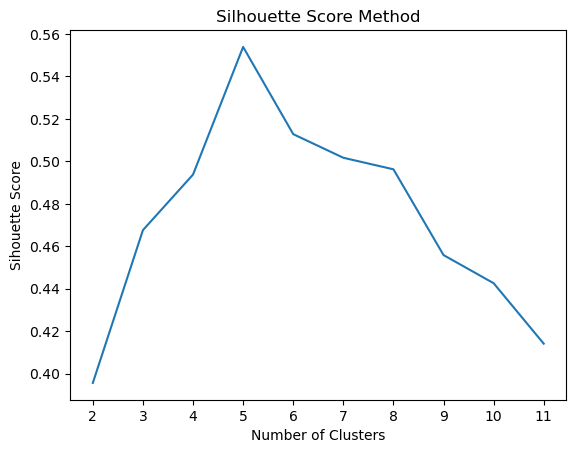

In [59]:
ss = []
for i in range(2,12):
    model = KMeans(n_clusters =i, random_state = 42)
    model.fit(X)
    score = silhouette_score(X, model.labels_)
    ss.append(score)

plt.plot(range(2,12), ss)
plt.title('Silhouette Score Method')
plt.xticks([2,3,4,5,6,7,8,9,10,11])
plt.xlabel('Number of Clusters')
plt.ylabel('Sihouette Score')
plt.show()   


In [60]:
# Implementation of Dendrograms

In [61]:
X.shape

(200, 2)

In [62]:
df1  = X.iloc[:31, :]

In [64]:
df1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [65]:
import scipy.cluster.hierarchy as shc

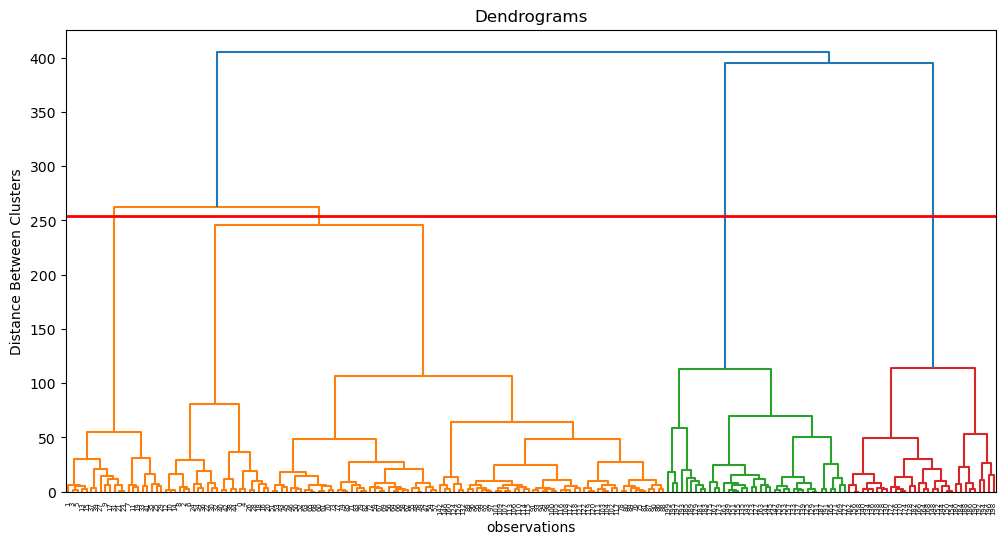

In [73]:
plt.figure(figsize = (12,6))
plt.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(X, method = 'ward'))
plt.axhline(y=254, lw= 2, c = 'red')
plt.ylabel('Distance Between Clusters')
plt.xlabel('observations')
plt.show()
                      

In [74]:
from sklearn.cluster import AgglomerativeClustering


In [75]:
model = AgglomerativeClustering(n_clusters = 5, metric  = 'euclidean', linkage = 'ward')
labels_ = model.fit_predict(X)

In [76]:
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [77]:
Xnew['y_Agglo'] = labels_

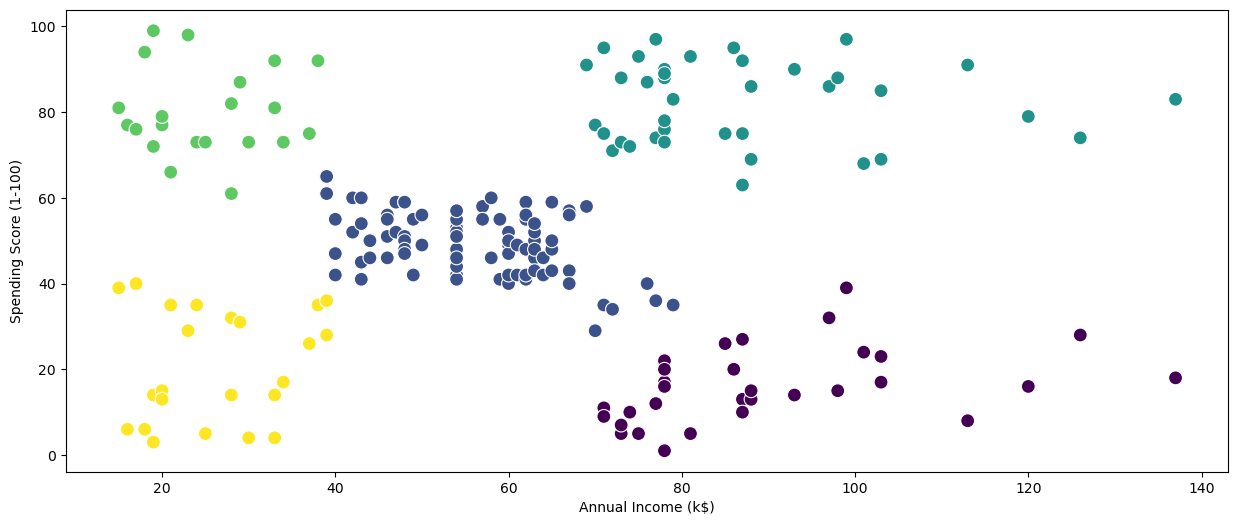

In [78]:
plt.figure(figsize = (15,6))
sns.scatterplot(x='Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'y_Agglo', data = Xnew, palette = 'viridis' , 
                size = 'y_kmeans',sizes = [100,100,100,100,100], legend = False)
plt.show()